## 1. 공급-수요 불균형 가설

### 가설 제목
* "IT 인력 공급이 수요를 초과하여 취업 경쟁이 심화되고 있다"

### 가설 내용
* 부트캠프, 코딩 교육 증가로 인한 신규 인력 급증으로 취업이 힘들어지고 있다.
* 기업의 실제 채용 규모와 지원자 수의 격차가 현격히 좁아져 취업이 힘들다.

데이터 수집 프롬프트: '파일 1개'를 올리고 아래 프롬프트로 데이터 하나씩 추출 및 검증

* 여러개를 올릴 경우 할루시네이션이 있습니다. 뽑혀진 데이터와 원본 데이터를 꼭 검증해주세요.

```
나는 아래 가설에 필요한 데이터를 수집하고 있어. 만약 필요한 데이터가 해당 파일에 있다면 파이썬 코드 형식도 함께 줄테니 그 코드에 맞춰 번호대로 데이터를 수집해줘.

---

## 1. 공급-수요 불균형 가설

### 가설 제목
* "IT 인력 공급이 수요를 초과하여 취업 경쟁이 심화되고 있다"

### 가설 내용
* 부트캠프, 코딩 교육 증가로 인한 신규 인력 급증으로 취업이 힘들어지고 있다.
* 기업의 실제 채용 규모와 지원자 수의 격차가 현격히 좁아져 취업이 힘들다.


--- 파이썬 데이터 형식 ---

import pandas as pd
import numpy as np

# 번호: 1번
# 자료: 00
# 제목 (자료 출처)
데이터이름 = {
    데이터
}
# 이 데이터에 대한 간단한 요약
```


실제 필요할 것 같은 데이터는 미리 클로드를 통해 가설을 주고 1 ~ 2개 정도만 생성해달라고 해주세요. 저는 필요한 데이터 일부 찾지 못했습니다. 필요하다고 생각했던 데이터는 아래와 같습니다.

```
부트캠프/코딩교육 시장 규모 및 배출인력 데이터
bootcamp_supply_data = {
    '연도': [2019, 2020, 2021, 2022, 2023, 2024],
    '부트캠프_수료생_추정': [3000, 4500, 8000, 12000, 18000, 25000],
    '기타_교육_수료생': [3000, 4500, 8000, 12000, 18000, 25000],
    '대학_관련학과_졸업생': [25000, 26000, 27000, 28000, 29000, 30000],
    '총_IT인력_공급_추정': [43000, 55500, 75000, 100000, 127000, 155000],
    '총_IT인력_수요_추정': [43000, 55500, 75000, 100000, 127000, 155000]
}
```

꼭 제미나이 이용해서 함께 분석하세요. 유용합니다.

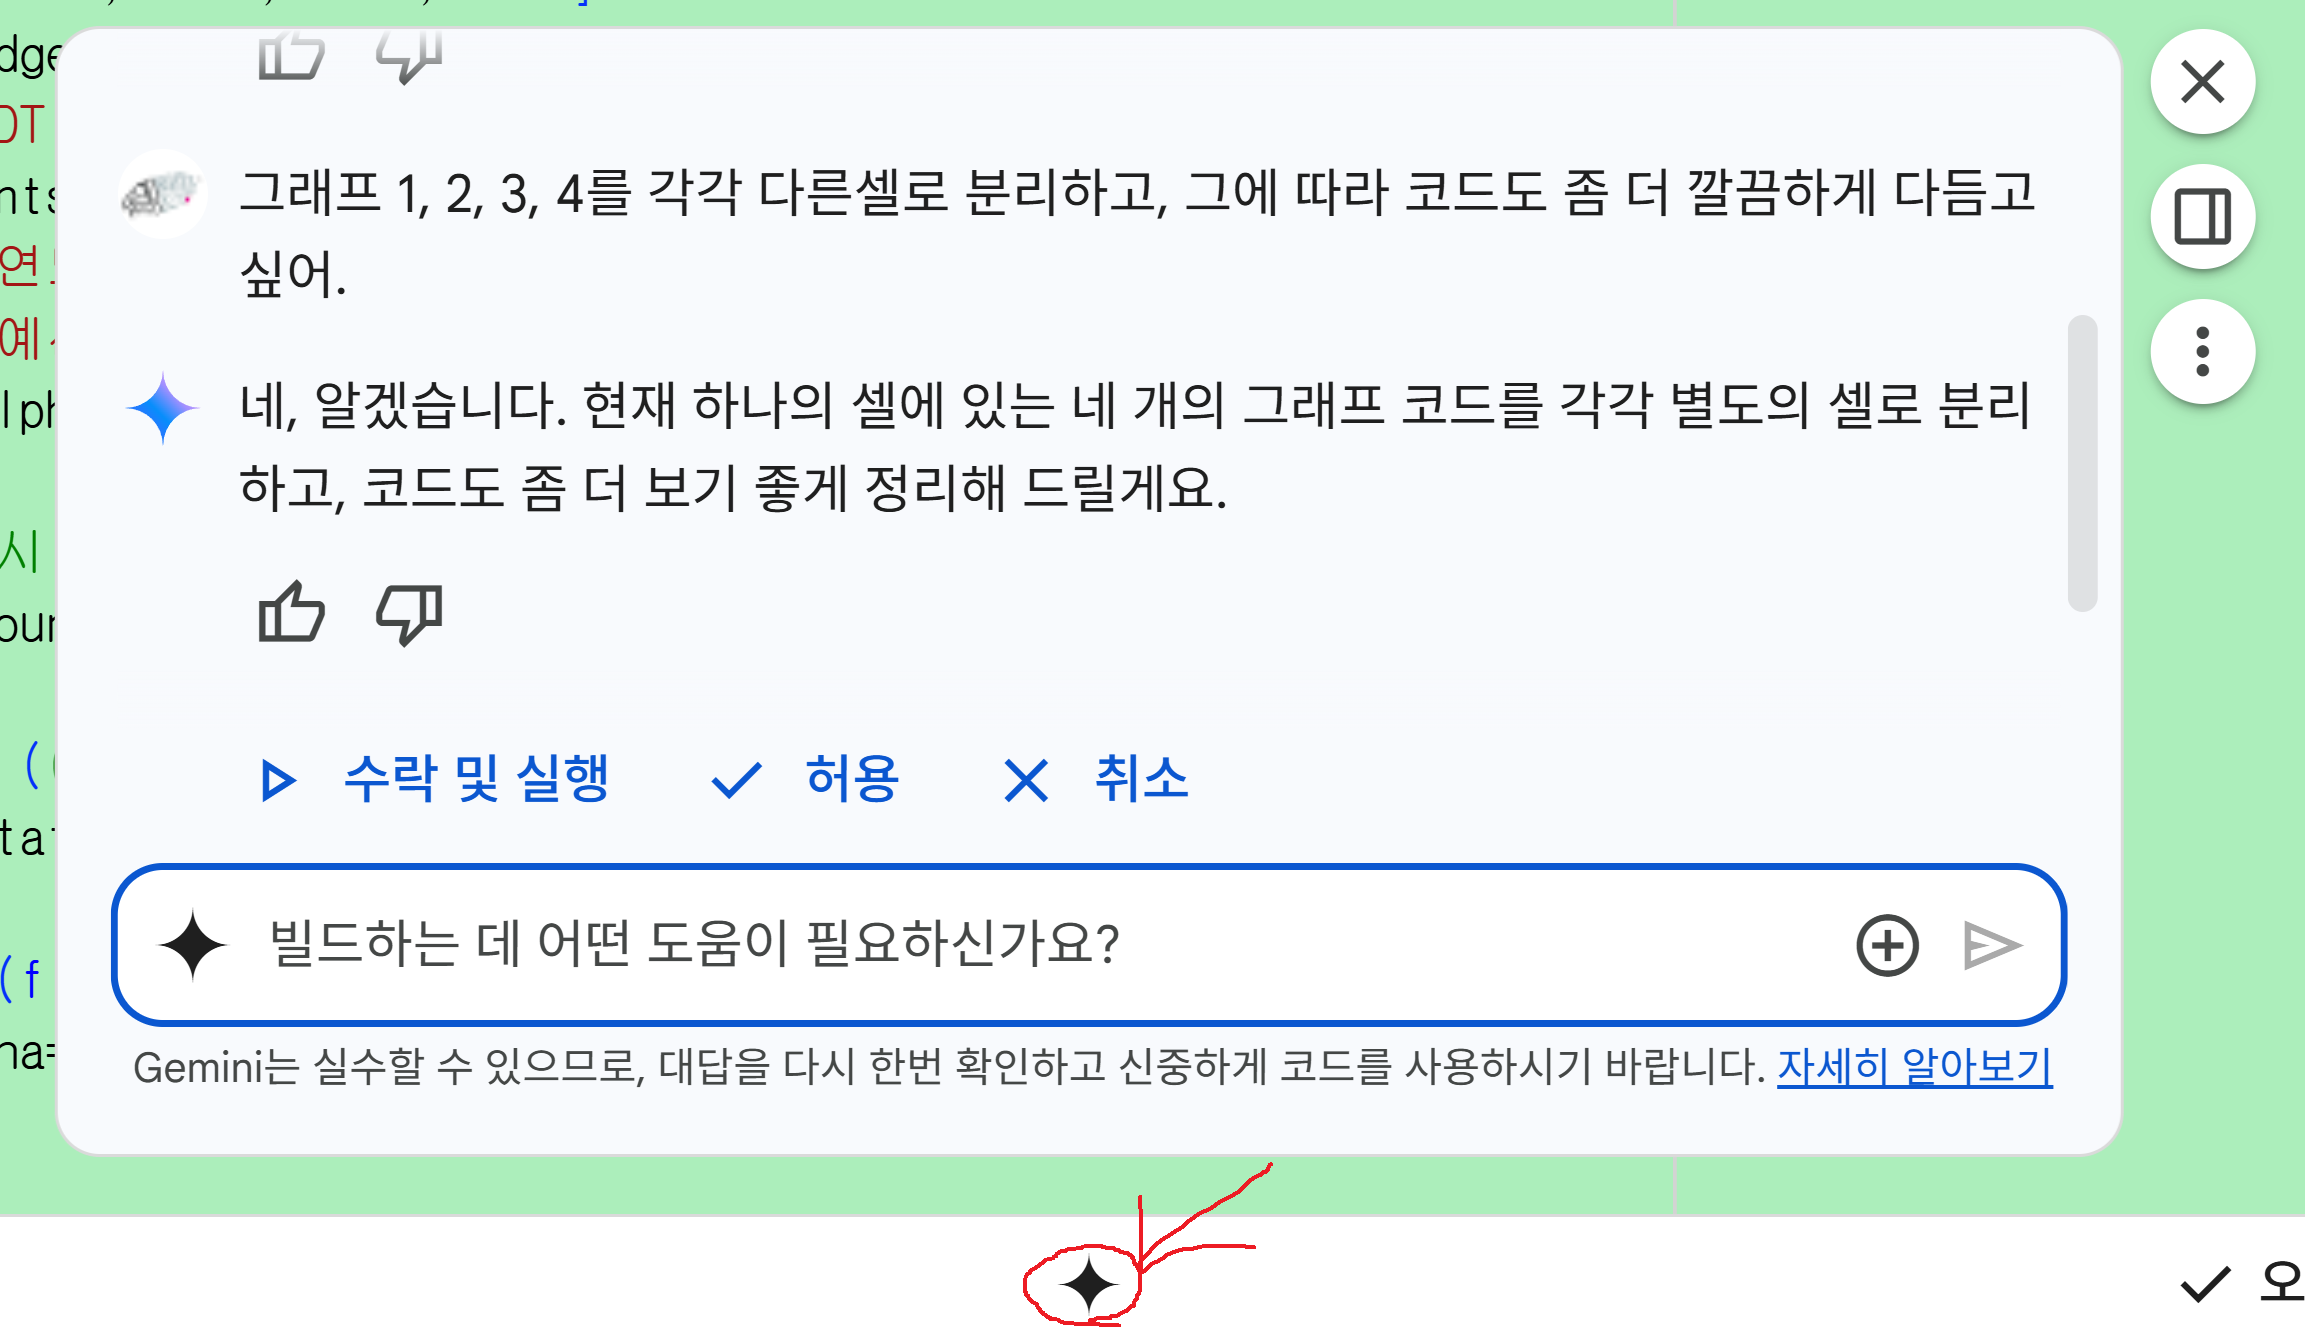

In [1]:
import pandas as pd
import numpy as np

# 자료: 2024년 산업기술인력 수급실태조사 공표자료

# 1. 연도별 산업기술인력 현황 데이터 (표 1-2 기반)
# 산업기술인력:
# 12대 주력산업
# 기계, 디스플레이, 반도체, 바이오헬스, 섬유, 자동차
# 전자, 조선, 철강, 화학, 소프트웨어(13.3%), IT 비즈니스(2.2%)
yearly_data = {
    '연도': [2019, 2020, 2021, 2022, 2023],
    '총근로자수': [4931028, 4869360, 4951110, 5015902, 5063630],
    '산업기술인력': [1672937, 1657673, 1681423, 1699674, 1716846],
    '비중_퍼센트': [33.9, 34.0, 34.0, 33.9, 33.9],
}

# 2. IT 관련 주력산업별 현황 데이터 (표 1-3 기반)
it_industries_data = {
    '연도': [2019, 2020, 2021, 2022, 2023] * 2,
    '산업': ['소프트웨어']*5 + ['IT비즈니스']*5,
    '산업기술인력': [142914, 146714, 148270, 150122, 151847,  # 소프트웨어
                    23403, 23793, 24273, 24839, 25379],     # IT비즈니스
    '증가율_퍼센트': [2.5, 2.7, 1.1, 1.2, 1.1,  # 소프트웨어
                    1.2, 1.7, 2.0, 2.3, 2.2]  # IT비즈니스
}

# 3. 12대 주력산업의 산업기술인력 부족률 변화 (표 1-4)
# ('19)2.5% ➠ ('20)2.5% ➠ ('21)2.5% ➠ ('22)2.6% ➠ ('23)2.6%
# 소프트웨어는 12대 산업군 중 가장 기술인력이 부족한
shortage_data = {
    '연도': [2019, 2020, 2021, 2022, 2023],
    '전체_산업기술인력_부족률': [2.5, 2.5, 2.5, 2.6, 2.6],
    '기계': [2.7, 2.6, 2.7, 2.7, 2.7],
    '디스플레이': [0.6, 0.5, 0.6, 0.7, 0.8],
    '반도체': [1.6, 1.6, 1.7, 1.6, 1.7],
    '바이오헬스': [3.2, 3.2, 3.4, 3.5, 3.3],
    '섬유': [2.6, 2.7, 2.9, 3.0, 3.2],
    '자동차': [2.0, 1.9, 1.9, 1.9, 1.9],
    '전자': [2.6, 2.6, 2.6, 2.6, 2.6],
    '조선': [1.0, 0.9, 1.1, 1.3, 1.3],
    '철강': [1.9, 1.7, 1.7, 1.8, 1.8],
    '화학': [3.3, 3.3, 3.4, 3.5, 3.6],
    '소프트웨어': [4.0, 4.0, 4.0, 4.1, 4.1],
    'IT비즈니스': [1.6, 1.6, 1.7, 1.9, 2.0]
}

# 그림 12-1에서
# 대기업의 부족율 대비 중소기업의 부족율은 6배 ~ 7배인 것을 알 수 있음
# 다만 해당 데이터 분석에서는 이 데이터가 의미 없다 생각하여 제외

# 표 1-10 미충원인력 변화에서
# 경력자의 수요는 -1.1% 줄어든 반면, 신입자의 수요는 5.1% 상승한 것을 볼 수 있음
# 다만 해당 데이터 분석에서는 이 데이터가 의미 없다 생각하여 제외

# 4. 구인·채용·미충원 현황 데이터 (표 2-30 기반)
# 채용률 = ( 채용인력 / 구인인력 ) * 100
recruitment_data = {
    '연도': [2019, 2020, 2021, 2022, 2023],
    '구인인력_전체': [145336, 144790, 150678, 153861, 155987],
    '구인인력_경력자': [78845, 78718, 82335, 84111, 86092],
    '구인인력_신입자': [65973, 65690, 67895, 69290, 69483],
    '채용인력_전체': [142298, 131817, 142840, 145574, 148636],
    '채용인력_경력자': [71759, 69089, 75450, 78763, 81472],
    '채용인력_신입자': [69969, 62434, 67079, 66462, 66885],
    '채용률_퍼센트': [97.9, 91.0, 94.8, 94.6, 95.3]
}

# 자료: 2024 정보기술분야 산업인력현황 분석 보고서
# 출처: 2023 SW산업 실태조사, 소프트웨어정책연구소
# 채용 애로사항: "필요한 역량을 갖춘 인력 부족"이 34.9%로 최대

# 5. 학력별 소프트웨어 전문인력 변화추이 (표Ⅳ-16 기반)
sw_education_trend = {
    '연도': [2019, 2020, 2021, 2022, 2023],
    '고졸_천명': [4.8, 3.6, 4.3, 6.5, 5.5],
    '전문학사_천명': [39.7, 41.3, 44.6, 49.4, 60.8],
    '학사_천명': [235.6, 244.3, 273.7, 294.1, 361.5],
    '석사_천명': [19.1, 21.7, 24.2, 34.2, 37.7],
    '박사_천명': [4.1, 4.1, 4.8, 6.9, 6.5],
    '총계_천명': [303.3, 315.0, 351.6, 391.1, 472.0]
}
# 소프트웨어 전문인력 급증: 2019년 303.3천명 → 2023년 472.0천명 (55.7% 증가)

# 6. 전공별 소프트웨어 전문인력 현황 데이터 (표 IV-14 기반)
sw_major_data = {
    '전공구분': ['SW계열', '공학계열', '자연계열', '기타', '소프트웨어 전문 인력'],
    '전체_천명': [375.3, 46.0, 31.9, 18.8, 472.0],
    '패키지SW_천명': [176.6, 27.5, 18.7, 11.7, 234.5],
    'IT서비스_천명': [123.1, 7.6, 5.6, 2.4, 138.7],
    '게임SW_천명': [38.7, 5.9, 3.9, 2.2, 50.7],
    '인터넷SW정보서비스_천명': [36.9, 5.0, 3.7, 2.4, 48.1],
    '대기업_천명': [68.4, 14.3, 10.3, 4.4, 97.5],
    '중소기업_천명': [307.0, 31.7, 21.6, 14.3, 374.5]
}

# 전공별 비중 계산 (전체 대비)
sw_major_ratio = {
    '전공구분': ['SW계열', '공학계열', '자연계열', '기타'],
    '전체대비_비중_퍼센트': [79.5, 9.7, 6.8, 4.0]
}

# 주요 특징:
# - SW계열이 79.5%로 압도적 비중
# - 공학계열 9.7%, 자연계열 6.8%, 기타 4.0%
# - 중소기업 근무자가 374.5천명으로 대기업(97.5천명)의 3.8배
# - 패키지SW 분야가 234.5천명으로 가장 많음


# 7. 산업인력 변화추이(표Ⅳ-1 기반)

# 교육계열, 사회계열, 예체능계열, 의약계열, 인문계열
ict_workforce_data = {
    '연도': [2017, 2018, 2019, 2020, 2021, 2022],
    'ICT산업인력_천명': [1023, 1039, 1031, 1066, 1125, 1220],
}
# ICT산업 인력 지속 증가: 2017년 1,023천명 → 2022년 1,220천명 (19.3% 증가)


# (한경) 수조원 쏟아 '테크 낭인' 양산…기대에 못 미친 AI인재 육성책
# 출처: https://www.hankyung.com/article/2025022584821
# 해당 뉴스 기사의 데이터 출처: 국회예산정책처 - 2025년도_예산안_위원회별_분석[환경노동위원회].pdf

# 8. 현대산업디지털 핵심인재 양성(KDT) 예산 및 지표 데이터
kdt_data = {
    '연도': [2021, 2022, 2023, 2024, 2025],
    'KDT_예산_억원': [2224, 3068, 4142, 4732, 4781],
}
# 2배정도 양성을 한 것으로 볼 수 있음
# 1명당 1천만원으로 단순환산 했을 때 47810명을 양성한 것으로도 볼 수 있음

# KDT 수료 후 6개월 내 취업률 데이터 (단위: %)
kdt_employment_data = {
    '연도': [2021, 2022, 2023],
    'KDT_취업률_퍼센트': [67.0, 63.5, 54.3]
}

# KDT 관련 직종 취업률 데이터 (단위: %)
kdt_related_employment_data = {
    '연도': [2021, 2022, 2023],
    'KDT_관련직종_취업률_퍼센트': [78.7, 76.3, 73.1]
}

# 수료 과정 중도탈락률 데이터 (단위: %)
dropout_comparison_data = {
    '구분': ['전체 구직자 훈련 평균', 'KDT'],
    '중도탈락률_퍼센트': [7.5, 12.4]
}

# 자료: 고용노동부 감사관실, K-디지털 트레이닝 특정감사 결과 (2025년 5월)
# 9. KDT 사업 현황 및 성과 데이터
kdt_audit_data = {
    '연도': [2021, 2022, 2023, 2024, 2025],
    'KDT_예산_백만원': [222462, 306822, 414260, 475688, 478116],
    'KDT_지원액_백만원': [81454, 233952, 369114, 475499, None],
    'KDT_집행률_퍼센트': [36.6, 76.3, 89.1, 100.0, None],
    'KDT_훈련배정인원_명': [24015, 28521, 36580, 44000, 45125],
    'KDT_훈련인원_명': [11727, 22394, 31922, 37628, None],
    'KDT_중도탈락인원_명': [681, 1529, 2479, 3485, None]
}

# KDT 훈련과정 수 변화
kdt_course_data = {
    '연도': [2021, 2022, 2023, 2024],
    'KDT_신청과정수': [296, 396, 431, 653],
    'KDT_승인과정수': [172, 187, 242, 431],
    'KDT_신청기관수': [139, 231, 229, 297],
    'KDT_승인기관수': [90, 136, 162, 241]
}

# KDT 취업률 현황 (아카데미 유형별)
kdt_employment_by_type = {
    '아카데미_유형': ['디지털 신기술', '벤처·스타트업', '첨단산업·디지털 선도기업', '지역·산업 주도형'],
    '2021년_취업률': [67.7, None, None, None],
    '2022년_취업률': [65.0, 62.3, 60.9, 68.4],
    '2023년_취업률': [55.7, 52.1, 56.9, 70.0]
}

# 2024년 KDT 과정별 운영 현황 (주요 분야)
kdt_2024_courses = {
    '분야': ['AI', '일반SW', '빅데이터', '클라우드', '메타버스', '로봇', '반도체', '사이버보안'],
    '운영과정수': [101, 238, 70, 57, 46, 26, 14, 15]
}

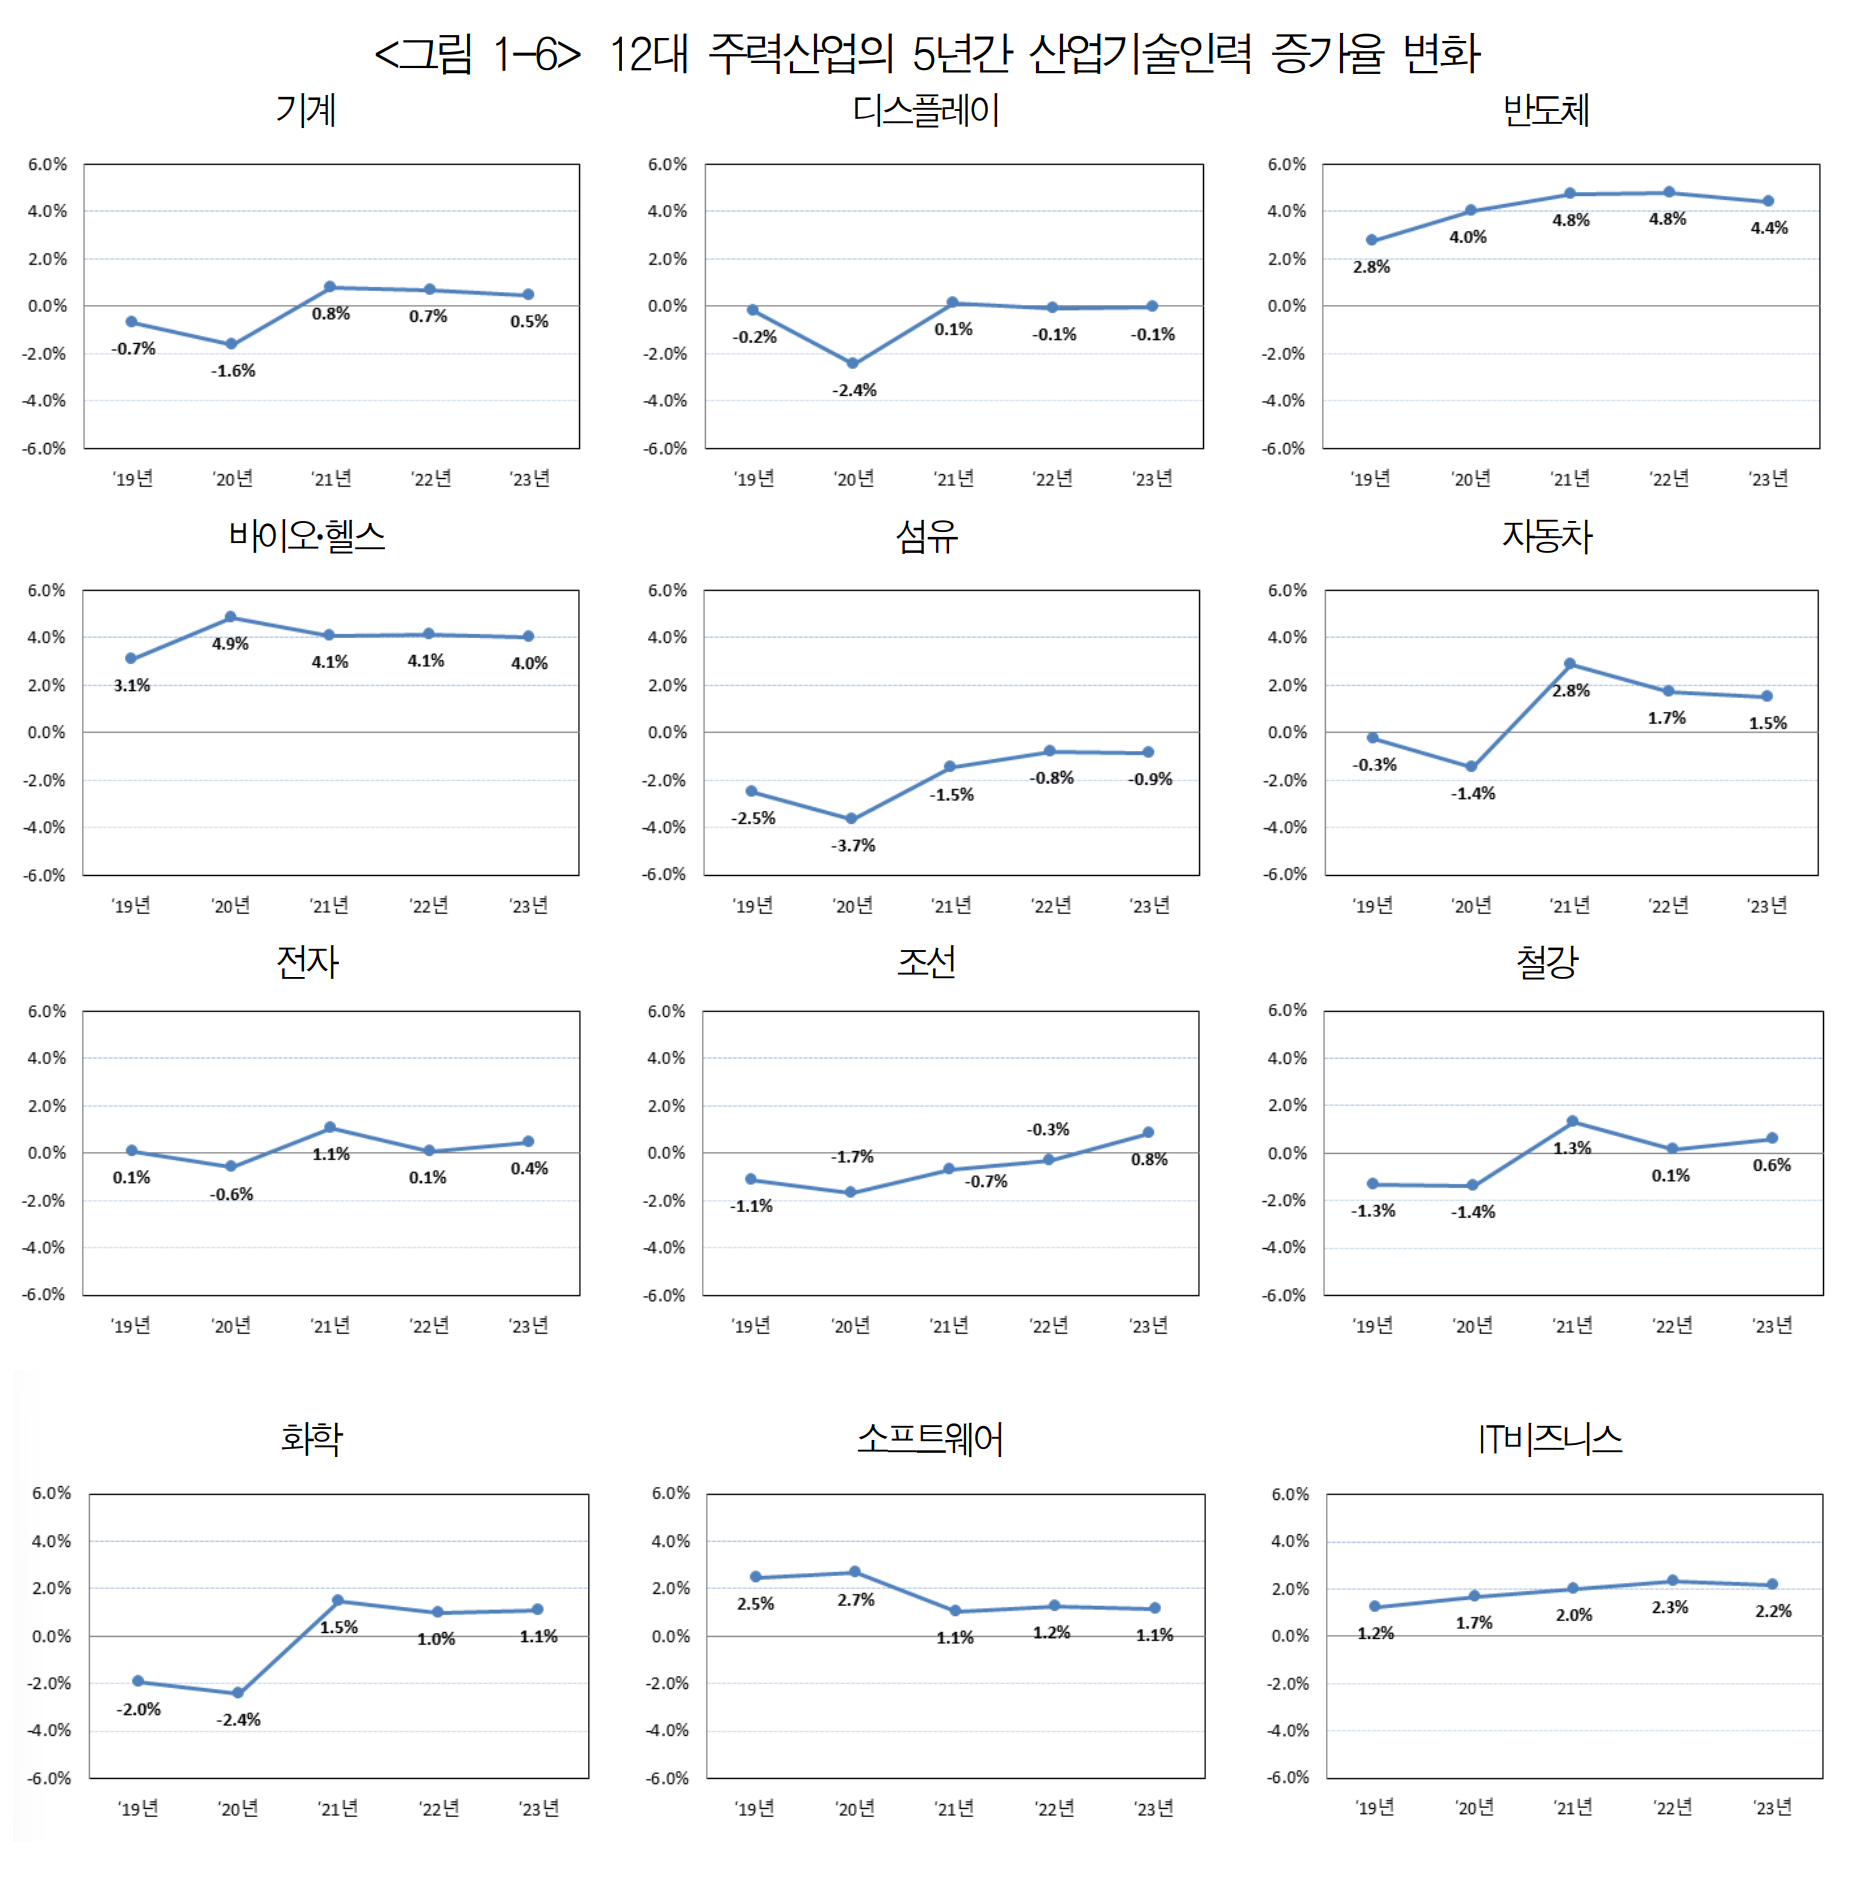

아래 데이터를 기반으로 산업에 필요한 부트캠프가 시장 수요에 따라 나왔는지도 살펴볼 필요가 있다 판단됩니다. - 출처: 2024년 정보기술분야 산업인력현황 분석 보고서

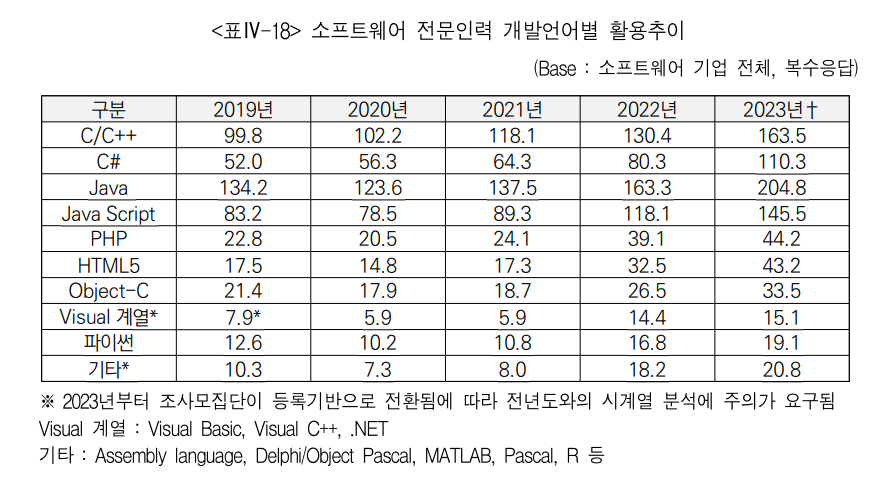

프롬프트:

```
나는 아래 데이터를 가지고 "KDT 부트캠프 등 다양한 IT 인력 공급이 수요를 초과하여 취업 경쟁이 심화되고 있다"라는 가설을 검증하려해. 이 가설을 검증하여 웹에 개시하려 하는데 개시할만한 데이터 3 ~ 4개를 python colab으로 시각화 해줘. 해당 데이터가 있는 블록은 이미 실행시킨 상태야.

-- 위 데이터 삽입 --
```

# 결론 도출

In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 찾기
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# Matplotlib의 rcParams에 폰트 설정 적용
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

print(f"Matplotlib에 설정된 폰트: {plt.rcParams['font.family']}")

Matplotlib에 설정된 폰트: ['NanumBarunGothic']


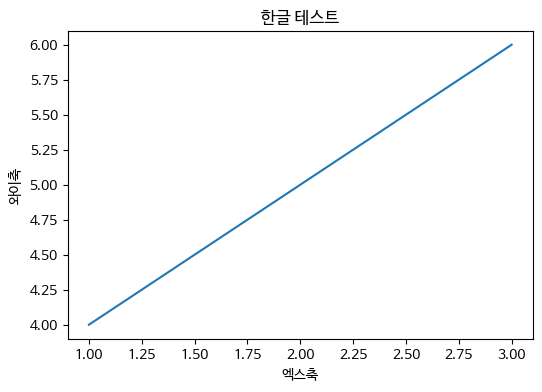

In [28]:
# 한글이 되는지 기본 그래프 실행
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 테스트')
plt.xlabel('엑스축')
plt.ylabel('와이축')
plt.show()

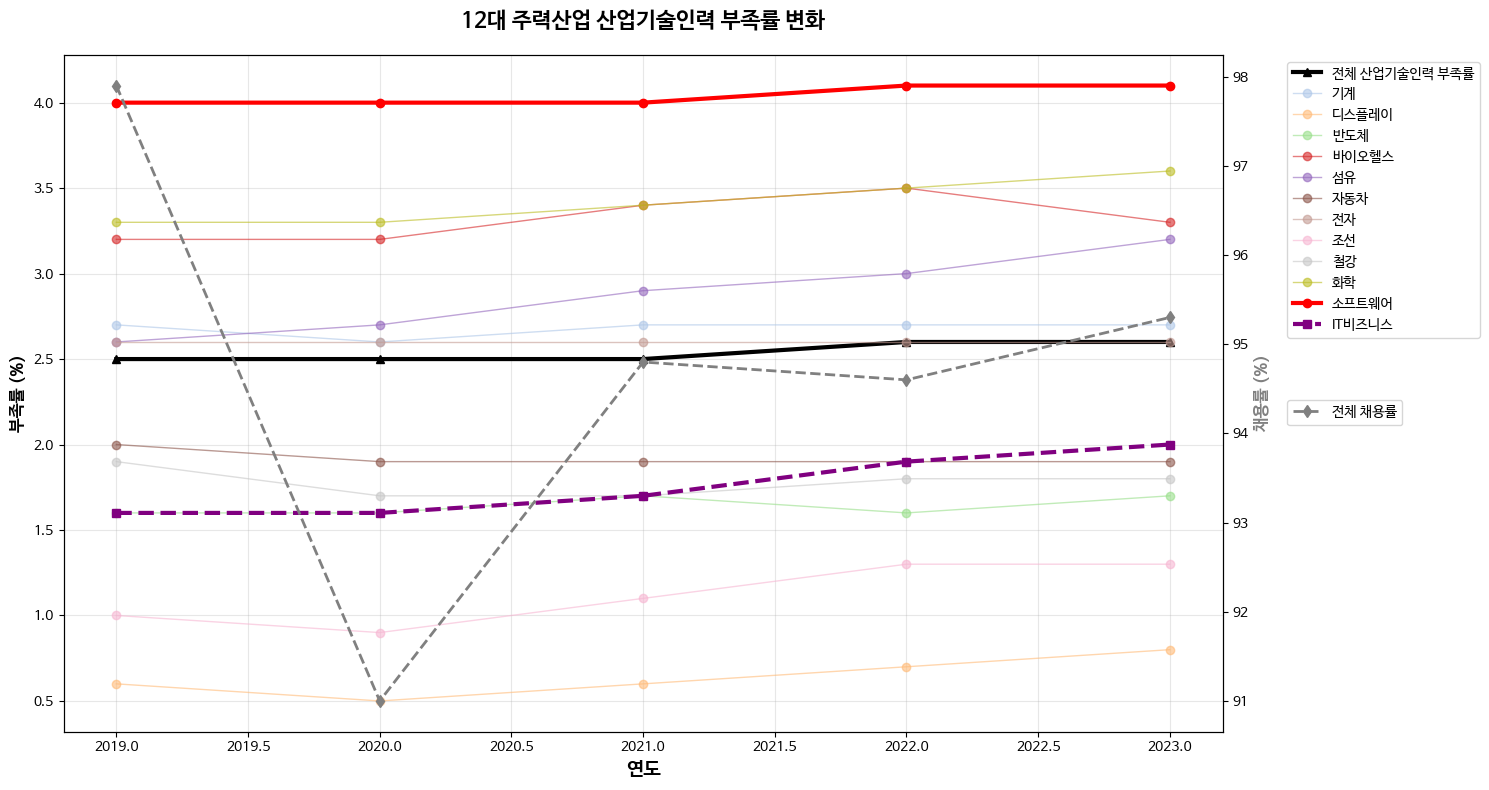

In [5]:
# 그래프 1: 12대 주력산업 산업기술인력 부족률 변화 및 채용률 비교

fig, ax1 = plt.subplots(figsize=(15, 8))

years = shortage_data['연도']
industries = ['전체_산업기술인력_부족률', '기계', '디스플레이', '반도체', '바이오헬스', '섬유', '자동차', '전자', '조선', '철강', '화학', '소프트웨어', 'IT비즈니스']

# 부족률 시각화
colors = plt.cm.tab20(np.linspace(0, 1, len(industries)))
for i, industry in enumerate(industries):
    if industry in ['소프트웨어', 'IT비즈니스', '전체_산업기술인력_부족률']:
        # 특정 산업 강조: 더 굵고 다른 스타일의 선 사용
        if industry == '소프트웨어':
            ax1.plot(years, shortage_data[industry], marker='o', linestyle='-', linewidth=3, color='red', label=industry.replace('_퍼센트', '').replace('_', ' '))
        elif industry == 'IT비즈니스':
            ax1.plot(years, shortage_data[industry], marker='s', linestyle='--', linewidth=3, color='purple', label=industry.replace('_퍼센트', '').replace('_', ' '))
        else: # 전체_산업기술인력_부족률
            ax1.plot(years, shortage_data[industry], marker='^', linestyle='-', linewidth=3, color='black', label=industry.replace('_퍼센트', '').replace('_', ' '))
    else:
        # 나머지 산업은 얇고 연한 선 사용
        ax1.plot(years, shortage_data[industry], marker='o', linestyle='-', linewidth=1, color=colors[i], alpha=0.6, label=industry.replace('_퍼센트', '').replace('_', ' '))


ax1.set_xlabel('연도', fontsize=14, fontweight='bold')
ax1.set_ylabel('부족률 (%)', fontsize=12, fontweight='bold')
ax1.set_title('12대 주력산업 산업기술인력 부족률 변화', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# 채용률 데이터를 두 번째 y축에 추가
ax2 = ax1.twinx()
years_recruitment = recruitment_data['연도']
recruitment_rate = recruitment_data['채용률_퍼센트']
ax2.plot(years_recruitment, recruitment_rate, marker='d', linestyle='--', color='gray', label='전체 채용률', linewidth=2) # 채용률 마커 변경 및 색상 변경
ax2.set_ylabel('채용률 (%)', fontsize=12, fontweight='bold', color='gray') # 채용률 Y축 라벨 색상 변경
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5), fontsize=10)

plt.tight_layout()
plt.show()

SW 산업은 12대 산업 군 중 가장 높은 부족률을 보이며 IT 인력에 대한 꾸준한 수요를 시사합니다. 전체 채용률은 2022년 11월 ChatGPT 출시와 2023년 4월 GPT-4 출시 이후에도 약 95% 수준을 유지하며 급격한 변동은 없었습니다. 이러한 추세를 볼 때, AI 기술 변화가 채용 시장에 미치는 즉각적이고 급격한 영향은 아직 크지 않다고 판단됩니다. 따라서 본격적인 기술 특이점이 예상되는 2025년 이후의 데이터를 더 면밀히 살펴볼 필요가 있습니다.

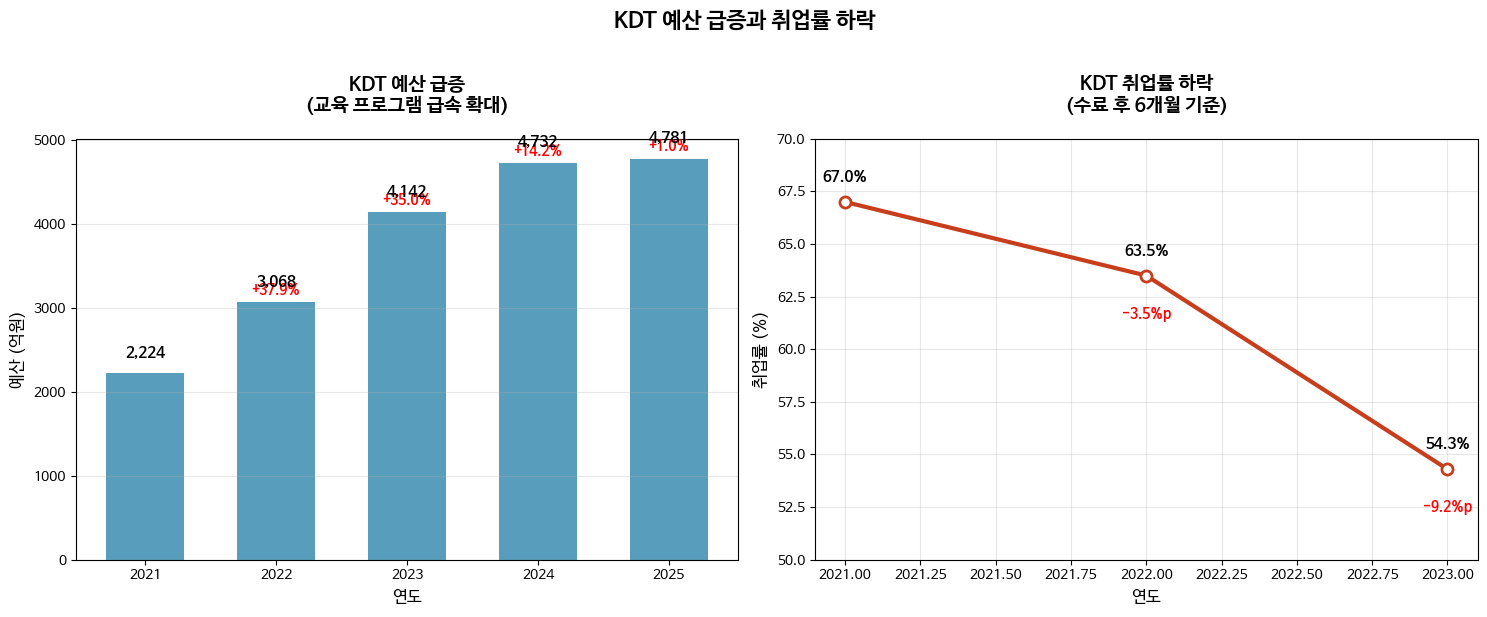

In [6]:
# 그래프 2: KDT 예산 급증과 취업률 하락
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 예산 증가
years_budget = [2021, 2022, 2023, 2024, 2025]
# KDT 사업 현황 및 성과 데이터에서 억원으로 변환
budget = [2224, 3068, 4142, 4732, 4781]
ax1.bar(years_budget, budget, color='#2E86AB', alpha=0.8, width=0.6)
ax1.set_title('KDT 예산 급증\n(교육 프로그램 급속 확대)',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('예산 (억원)', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# 예산 증가율 표시
for i, (year, amount) in enumerate(zip(years_budget, budget)):
    if i > 0:
        growth = ((amount - budget[i-1]) / budget[i-1]) * 100
        ax1.annotate(f'+{growth:.1f}%', (year, amount + 100),
                    ha='center', fontsize=10, fontweight='bold', color='red')
    ax1.annotate(f'{amount:,}', (year, amount + 200),
                ha='center', fontsize=11, fontweight='bold')

# 취업률 하락
years_employment = [2021, 2022, 2023] # Adjusted years to match available data
# 국회예산정책처 - 2025년도_예산안_위원회별_분석[환경노동위원회]
# KDT 수료 후 6개월 내 취업률 데이터 (단위: %)
employment_rate = [67.0, 63.5, 54.3]
ax2.plot(years_employment, employment_rate, marker='o', linewidth=3,
         markersize=8, color='#C73E1D', markerfacecolor='white',
         markeredgewidth=2, markeredgecolor='#C73E1D')
ax2.set_title('KDT 취업률 하락\n(수료 후 6개월 기준)',
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('연도', fontsize=12)
ax2.set_ylabel('취업률 (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(50, 70)

# 하락률 표시
for i, (year, rate) in enumerate(zip(years_employment, employment_rate)):
    if i > 0:
        decline = rate - employment_rate[i-1]
        ax2.annotate(f'{decline:.1f}%p', (year, rate - 2),
                    ha='center', fontsize=10, fontweight='bold', color='red')
    ax2.annotate(f'{rate}%', (year, rate + 1),
                ha='center', fontsize=11, fontweight='bold')

plt.suptitle('KDT 예산 급증과 취업률 하락',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

정부의 디지털 인재 양성 사업인 KDT(K-디지털 트레이닝)에 투입된 예산은 이러한 부족율에 근거하여 적절하다 생각됩니다. 가트너에 따르면 글로벌 소프트웨어 산업은 27년까지도 고성장세로 예측되었습니다. 과기정통부 ICT주요품목동향조사에서도 28년도까지 성장을 예측했습니다. 이러한 가운데 한국의 SW 인력 부족은 12대 산업군 중 가장 부족율이 컸으며, 이 간극을 학부생의 졸업생만으로 채울 수 없었기 때문입니다. 이 간극을 매우기 위해 KDT를 2021년부터 2025년까지 약 115%를 급증시켰으며 이는 정부의 SW 인재양성 의지가 컸음을 보여줍니다.

다만 이렇게 양성된 학생들이 부족율에 근거하면 취업이 잘 되었어야 했는데 취업율은 계속 줄어드는 것을 볼 수 있습니다. 부트캠프를 수료한 인력의 6개월 기준 취업률이 2021년 67.0%에서 2023년 54.3%로 약 19%p 급격히 하락하는 추세를 보입니다.

주의깊게 볼 점은 여전히 시장의 부족율은 12대 산업군 최고이며, 채용 시장이 23년에는 급격히 줄어들지 않았다는 점입니다. 시장과 채용 규모가 줄지 않았는데 채용율이 떨어졌다는 것은 실제 취업 시장으로의 연계가 원활하지 않거나, 시장의 요구와 공급되는 인력 간에 미스매치가 발생하고 있을 가능성을 시사합니다. 따라서 단순히 교육 프로그램 확대를 통한 인력 공급 증가만이 IT 인력 취업 경쟁 심화 문제를 해결하는 데는 한계가 있을 수 있음을 보여주는 중요한 증거입니다.

24년 정보기술분야 산업인력현황 분석 보고서에 따르면 채용 애로사항은 필요한 역량을 갖춘 인력 부족(34.9%), 채용에 따르는 인건비 부담(33.3%), 우수한 인력의 입사 지원 부족(14.8%) 순으로 조사되었습니다.

"필요한 인재가 부트캠프로 인해 육성되었는가?" 측면에서 본다면 '2024년 재정지원 일자리사업 평가'에서는 중도탈락률이 높은 이유에 대하여 사업 참여자의 약 60~70%가 비전공자로서 높은 수준의 교육을 수강하는 데 어려움이 있기 때문이라고 분석한 결과를 눈여겨 볼 필요가 있습니다. 여기서 주목할 부분은 '중도탈락률'이 아니라, 부트캠프 비전공자 비중입니다.

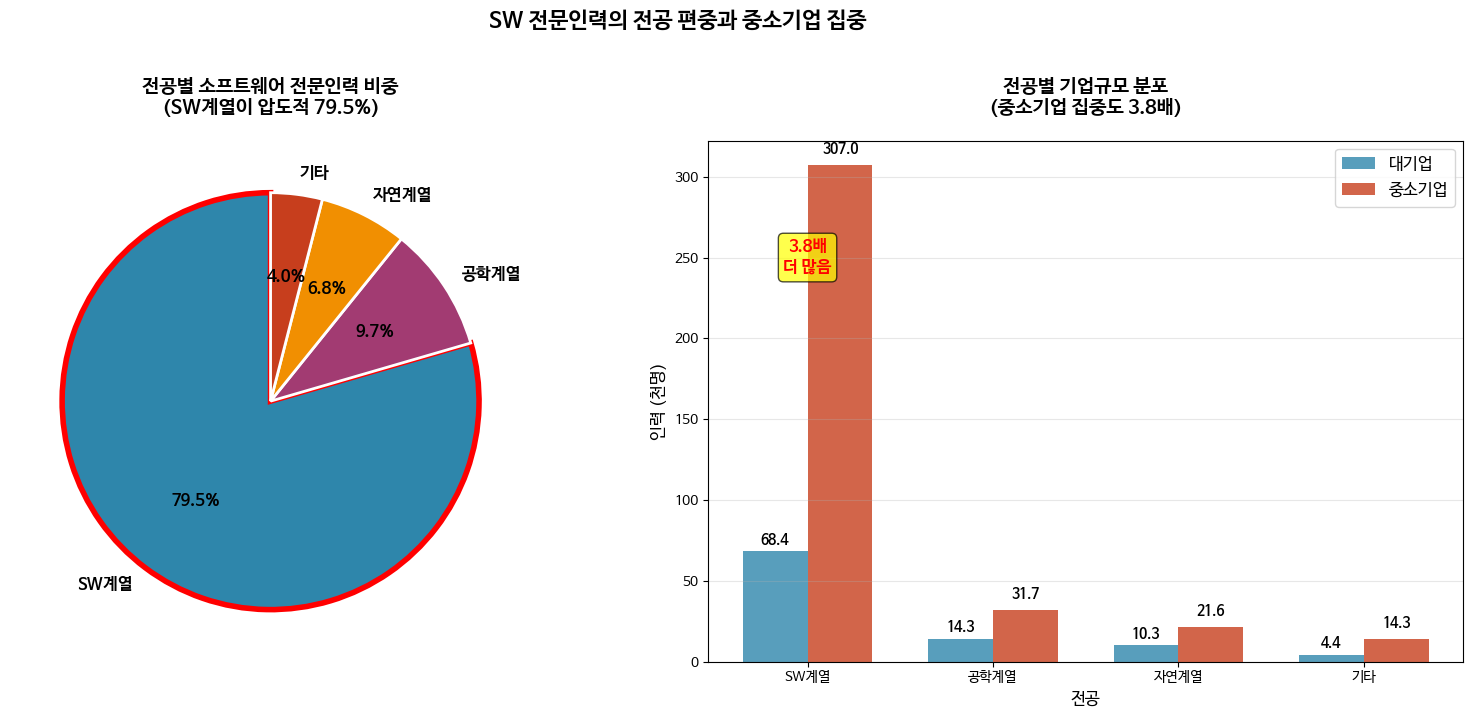

In [32]:
# 그래프 3: SW 전문인력의 전공 편중과 중소기업 집중
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#8B5A2B', '#6A994E']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

majors = sw_major_ratio['전공구분']
ratios = sw_major_ratio['전체대비_비중_퍼센트']
colors_pie = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# 파이차트 스타일링
wedges, texts, autotexts = ax1.pie(ratios, labels=majors, autopct='%1.1f%%',
                                  colors=colors_pie, startangle=90,
                                  textprops={'fontsize': 12, 'fontweight': 'bold'},
                                  wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# SW계열 강조
wedges[0].set_linewidth(4)
wedges[0].set_edgecolor('red')

ax1.set_title('전공별 소프트웨어 전문인력 비중\n(SW계열이 압도적 79.5%)',
              fontsize=14, fontweight='bold', pad=20)

# 기업규모별 분포
# 2024 정보기술분야 산업인력현황 분석 보고서
# 전공별 소프트웨어 전문인력 현황 데이터 (표 IV-14 기반)
majors_company = ['SW계열', '공학계열', '자연계열', '기타']
large_company = [68.4, 14.3, 10.3, 4.4] # 대기업
small_company = [307.0, 31.7, 21.6, 14.3] # 중소기업

x = np.arange(len(majors_company))
width = 0.35

bars1 = ax2.bar(x - width/2, large_company, width, label='대기업',
                color='#2E86AB', alpha=0.8)
bars2 = ax2.bar(x + width/2, small_company, width, label='중소기업',
                color='#C73E1D', alpha=0.8)

ax2.set_title('전공별 기업규모 분포\n(중소기업 집중도 3.8배)',
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('전공', fontsize=12)
ax2.set_ylabel('인력 (천명)', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(majors_company)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# 값 표시
for bar in bars1:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width()/2., height + 2),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width()/2., height + 5),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 비율 강조 텍스트
ax2.text(0, 250, '3.8배\n더 많음', ha='center', va='center',
         fontsize=12, fontweight='bold', color='red',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

plt.suptitle('SW 전문인력의 전공 편중과 중소기업 집중',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

위와 같이 산업에서 '전공자'가 차지하는 비중이 압도적입니다. '전공자'가 아니더라도 공학계열이나 자연계열이 차지하는 비중이 96%나 됩니다. 그러나 부트캠프에는 비전공자 비중이 높죠. 위 수치로 보더라도 산업에서 원하는 인재는 '전공자'일 가능성이 높습니다. 그것이 아니라면, 제대로 교육을 오랫동안 받은 훈련된 인재일 가능성이 높습니다.

부트캠프는 차등화 전략이 필요합니다. 전공자를 위한 트랙과, 비전공자를 위한 트랙을 분류하고, 전공자를 위한 트랙을 기초 트랙과 고도화 트랙, 비전공자를 위한 기초 트랙과 고도화 트랙으로 분류하여, 각각 사정에 맞는 맞춤형 교육을 할 필요가 있습니다. 현재는 KDT와 KDT 단기 심화 과정 등으로 수강생 맞춤형이 아니라 커리큘럼 맞춤형으로 구성이 되어 있습니다.

오랫동안 부트캠프 강사를 해온 경험으로 '비전공자'와 '전공자' 또는 '경력자'분이 섞인 부트캠프의 경우 '전공자'와 '경력자'가 얻어갈 지식이 매우 적어지는 일이 발생되게 됩니다. 또한 '비전공자'와 '전공자'의 취업 전략이 다를 수 밖에 없습니다. 특히 '비전공자'의 경우에는 이를 극복할 수 있는 다양한 시도가 장기적으로 필요합니다. 부트캠프에서는 '책 출판', '오픈소스', '실제 규모있는 서비스 개발', '컨퍼런스 발표' 등의 다양한 비전공자를 위한 이벤트를 만들어 운영해야 합니다.

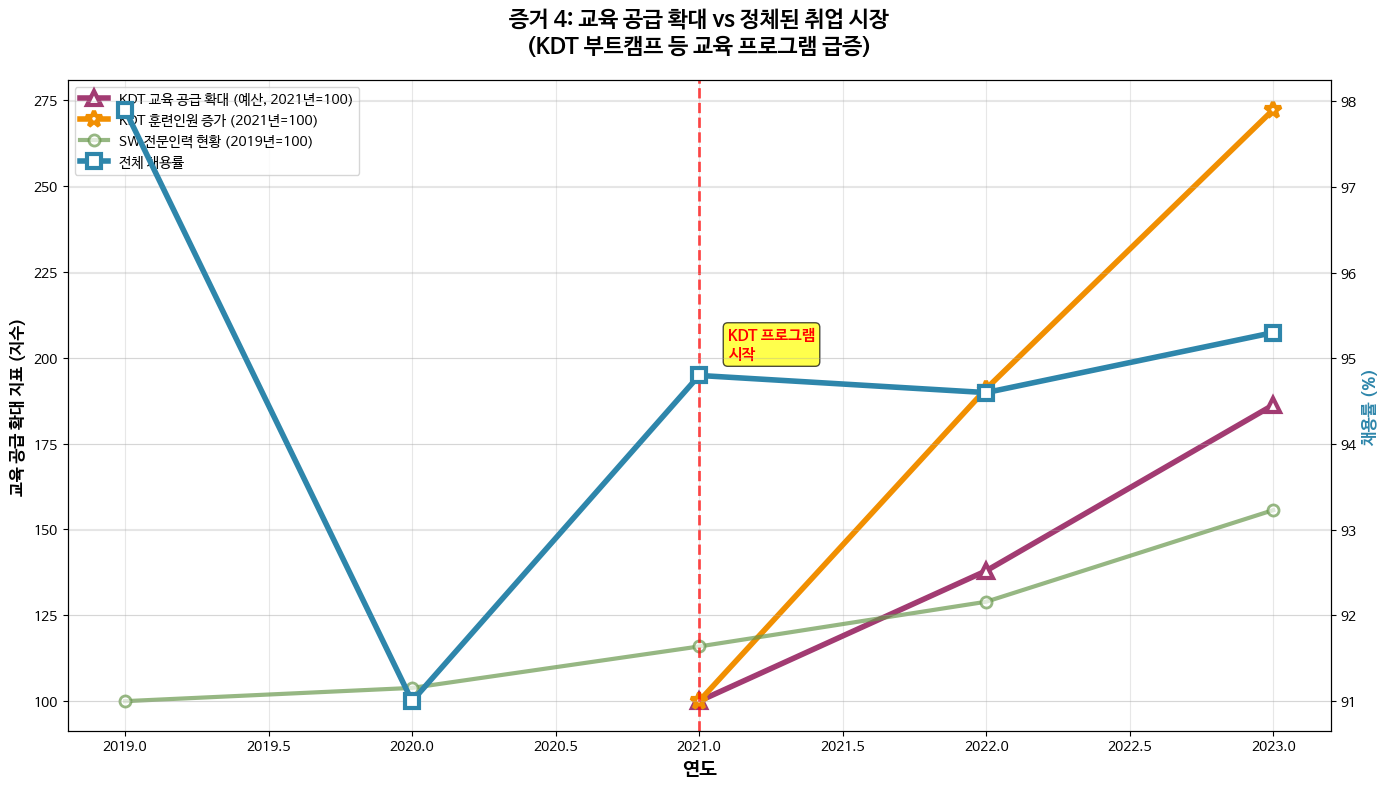

In [41]:
# 그래프 4: 종합 분석 - 공급 급증 vs 채용률 정체
fig, ax = plt.subplots(figsize=(14, 8))

# 기존 데이터 활용
years_combined = yearly_data['연도']  # [2019, 2020, 2021, 2022, 2023]

# KDT 예산 데이터 (2021년 기준 정규화) - 교육 공급 확대 지표
kdt_years = kdt_data['연도']  # [2021, 2022, 2023, 2024, 2025]
kdt_budget_raw = kdt_data['KDT_예산_억원']  # [2224, 3068, 4142, 4732, 4781]

# 2021-2023년 데이터만 사용 (years_combined와 맞춤)
kdt_budget_for_chart = [kdt_budget_raw[i] for i in range(3)]  # 2021, 2022, 2023
kdt_budget_normalized = [b / kdt_budget_for_chart[0] * 100 for b in kdt_budget_for_chart]

# KDT 훈련인원 데이터 (실제 공급 지표) - 2019년 기준으로 정규화
kdt_trainees = [0, 0, 11727, 22394, 31922]  # 2019, 2020은 0 (KDT 미시행)
kdt_trainees_normalized = [t / 11727 * 100 if t > 0 else 0 for t in kdt_trainees]  # 2021년=100

# 기존 SW 전문인력 현황 (2019년 기준 정규화) - 시장 내 인력 증가
sw_workforce_existing = sw_education_trend['총계_천명']  # [303.3, 315.0, 351.6, 391.1, 472.0]
sw_workforce_growth = [w / sw_workforce_existing[0] * 100 for w in sw_workforce_existing]

# 채용률 데이터
recruitment_rate = recruitment_data['채용률_퍼센트']  # [97.9, 91.0, 94.8, 94.6, 95.3]

# 이중 축
ax2 = ax.twinx()

# 공급 확대 지표들
# 1. KDT 교육 공급 확대 (예산)
kdt_chart_years = years_combined[2:]  # [2021, 2022, 2023]
ax.plot(kdt_chart_years, kdt_budget_normalized, marker='^', linewidth=4, markersize=10,
        color='#A23B72', label='KDT 교육 공급 확대 (예산, 2021년=100)',
        markerfacecolor='white', markeredgewidth=3)

# 2. KDT 실제 훈련인원 증가 (공급 지표) - 2021년부터만 표시
kdt_trainee_years = years_combined[2:]  # [2021, 2022, 2023]
kdt_trainee_data = [11727, 22394, 31922]  # 2021, 2022, 2023
kdt_trainees_normalized = [t / kdt_trainee_data[0] * 100 for t in kdt_trainee_data]  # 2021년=100

ax.plot(kdt_trainee_years, kdt_trainees_normalized, marker='*', linewidth=4, markersize=12,
        color='#F18F01', label='KDT 훈련인원 증가 (2021년=100)',
        markerfacecolor='white', markeredgewidth=3)

# 3. 기존 SW 전문인력 현황 (시장 내 인력)
ax.plot(years_combined, sw_workforce_growth, marker='o', linewidth=3, markersize=8,
        color='#6A994E', label='SW 전문인력 현황 (2019년=100)', alpha=0.7,
        markerfacecolor='white', markeredgewidth=2)

# 수요/채용 지표
ax2.plot(years_combined, recruitment_rate, marker='s', linewidth=4, markersize=10,
         color='#2E86AB', label='전체 채용률',
         markerfacecolor='white', markeredgewidth=3)

# 축 레이블
ax.set_xlabel('연도', fontsize=14, fontweight='bold')
ax.set_ylabel('교육 공급 확대 지표 (지수)', fontsize=12, fontweight='bold', color='black')
ax2.set_ylabel('채용률 (%)', fontsize=12, fontweight='bold', color='#2E86AB')

# 제목
ax.set_title('증거 4: 교육 공급 확대 vs 정체된 취업 시장\n(KDT 부트캠프 등 교육 프로그램 급증)',
             fontsize=16, fontweight='bold', pad=20)

# 임계점 표시
ax.axvline(x=2021, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax.text(2021.1, 200, 'KDT 프로그램\n시작', fontsize=11,
        fontweight='bold', color='red',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# 범례
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

ax.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

처음 가설이었던 "IT 인력 공급이 수요를 초과하여 취업 경쟁이 심화되고 있다"는 가설을 완전히 검증하기 위해서는 더 다양한 데이터가 필요합니다. 하지만 주어진 데이터를 분석한 결과, 12대 산업군의 부족률을 통해 볼 때 단순한 공급 과잉보다는 '수요-공급 간 미스매치' 문제로 보입니다. 특히 기업 채용 애로사항 중 "필요한 역량을 갖춘 인력 부족"이 34.9%로 가장 높게 나타난 점에서, 양적 부족이 아닌 질적 불일치가 핵심 문제임을 확인할 수 있습니다.

이러한 미스매치 문제는 KDT 수료생 현황에서 더욱 명확히 드러납니다. 동일한 표준화된 커리큘럼으로 교육받은 KDT 수료생이 2021년 11,727명에서 2024년 37,628명으로 3배 이상 급증하면서, 비슷한 역량을 가진 구직자들 간의 취업 경쟁이 심화되고 있습니다.

실제로 이런 경쟁 심화는 구체적인 지표로도 확인됩니다. KDT 수료 후 6개월 내 취업률은 2021년 67.0%에서 2023년 54.3%로 지속적으로 하락했으며, 관련 직종 취업률 역시 78.7%에서 73.1%로 감소했습니다. 더욱 주목할 점은 KDT 중도탈락률이 12.4%로 일반 직업훈련 평균(7.5%)보다 65% 높다는 것입니다. 이는 취업 전망에 대한 불확실성이 어느정도 반영된 결과로 해석됩니다.

결론적으로, IT 분야는 여전히 인력이 부족한 상황이지만, 기업이 요구하는 역량과 교육 과정을 통해 배출되는 인력의 역량 간 격차가 존재합니다. 특히 표준화된 부트캠프 교육의 급속한 확산으로 유사한 스킬셋을 가진 인력들이 동일한 시장에서 경쟁하게 되면서, 개별 구직자 입장에서는 취업 경쟁이 심화되는 역설적 상황이 발생하고 있습니다. 만약 교육 과정이 기업 요구 역량을 충분히 충족했다면 부족률이 감소했을 것이나, 현실은 그렇지 않습니다. 이는 유사한 기초 스킬셋을 보다 차별화되고 전문적으로 발전시킬 필요가 있음을 시사합니다.

따라서 향후 IT 인력 양성 정책은 단순한 양적 확대보다는 산업 현장의 다양한 수요를 반영한 차별화된 교육 과정 개발과 질적 향상을 도모해야 합니다. 특히 전공자와 비전공자의 서로 다른 강점과 학습 배경을 고려한 맞춤형 교육 설계를 통해, 획일화된 인력 배출에서 벗어나 다양성과 전문성을 겸비한 인재 양성에 중점을 두어야 할 것입니다.